## Loss analysis tools for faster training

In [1]:
# As usual, a bit of setup
import matplotlib.pyplot as plt
import extract_seconds
from parse_log import parse_log
from pprint import pprint
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

### parse log file function

In [2]:
# test parse_log
logfile_path = "/home/peic/voc-faster-rcnn/experiments/logs/faster_rcnn_end2end_VGG16.txt.2018-01-03_20-24-28"

train_dict_list, test_dict_list = parse_log(logfile_path)


In [3]:
print(type(train_dict_list[0]))
for k, v in train_dict_list[0].items():
    print k
    print v

<class 'collections.OrderedDict'>
NumIters
20.0
Seconds
22.247209
LearningRate
0.001
accuracy
0.992188
loss_bbox
0.000304095
loss_cls
0.0674952
rpn_cls_loss
0.192309
rpn_loss_bbox
0.162847


In [4]:
pprint(train_dict_list)
pprint(test_dict_list)

[OrderedDict([('NumIters', 20.0), ('Seconds', 22.247209), ('LearningRate', 0.001), ('accuracy', 0.992188), ('loss_bbox', 0.000304095), ('loss_cls', 0.0674952), ('rpn_cls_loss', 0.192309), ('rpn_loss_bbox', 0.162847)]),
 OrderedDict([('NumIters', 40.0), ('Seconds', 45.01974), ('LearningRate', 0.001), ('accuracy', 0.984375), ('loss_bbox', 0.0196099), ('loss_cls', 0.070526), ('rpn_cls_loss', 0.149405), ('rpn_loss_bbox', 0.0654294)]),
 OrderedDict([('NumIters', 60.0), ('Seconds', 67.229101), ('LearningRate', 0.001), ('accuracy', 0.929688), ('loss_bbox', 0.184022), ('loss_cls', 0.26834), ('rpn_cls_loss', 0.195766), ('rpn_loss_bbox', 0.171613)]),
 OrderedDict([('NumIters', 80.0), ('Seconds', 89.236277), ('LearningRate', 0.001), ('accuracy', 0.960938), ('loss_bbox', 0.0824081), ('loss_cls', 0.152712), ('rpn_cls_loss', 0.122791), ('rpn_loss_bbox', 0.0316606)]),
 OrderedDict([('NumIters', 100.0), ('Seconds', 111.422395), ('LearningRate', 0.001), ('accuracy', 0.976562), ('loss_bbox', 0.0225336),

 OrderedDict([('NumIters', 42600.0), ('Seconds', 47642.755677), ('LearningRate', 0.001), ('accuracy', 0.992188), ('loss_bbox', 0.0133418), ('loss_cls', 0.0132131), ('rpn_cls_loss', 0.000312119), ('rpn_loss_bbox', 0.000706926)]),
 OrderedDict([('NumIters', 42620.0), ('Seconds', 47665.239468), ('LearningRate', 0.001), ('accuracy', 0.984375), ('loss_bbox', 0.0463978), ('loss_cls', 0.0521081), ('rpn_cls_loss', 0.000510315), ('rpn_loss_bbox', 0.00341379)]),
 OrderedDict([('NumIters', 42640.0), ('Seconds', 47688.08934), ('LearningRate', 0.001), ('accuracy', 0.992188), ('loss_bbox', 0.0162703), ('loss_cls', 0.0124625), ('rpn_cls_loss', 0.000982448), ('rpn_loss_bbox', 0.000953731)]),
 OrderedDict([('NumIters', 42660.0), ('Seconds', 47710.983402), ('LearningRate', 0.001), ('accuracy', 1.0), ('loss_bbox', 0.0327645), ('loss_cls', 0.00798568), ('rpn_cls_loss', 0.000288159), ('rpn_loss_bbox', 0.00488269)]),
 OrderedDict([('NumIters', 42680.0), ('Seconds', 47733.372633), ('LearningRate', 0.001), ('

3499


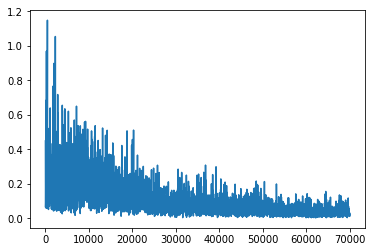

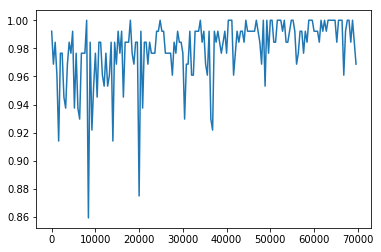

In [11]:
train_num_iters = []
train_seconds = []
train_learning_rates = []
train_bbox_loss = []
train_cls_loss = []
train_rpn_cls_loss = []
train_rpn_bbox_loss = []
accuracy = []
for d in train_dict_list:
    train_num_iters.append(d['NumIters'])
    train_seconds.append(d['Seconds'])
    train_learning_rates.append(d['LearningRate'])
    train_bbox_loss.append(d['loss_bbox'])
    train_cls_loss.append(d['loss_cls'])
    train_rpn_cls_loss.append(d['rpn_cls_loss'])
    train_rpn_bbox_loss.append(d['rpn_loss_bbox'])
    accuracy.append(d['accuracy'])

print(len(train_num_iters))
train_bbox_loss = np.array(train_bbox_loss)
train_cls_loss = np.array(train_cls_loss)
train_loss = train_bbox_loss + train_cls_loss

plt.figure()
plt.plot(train_num_iters, train_loss)
plt.figure()
plt.plot(train_num_iters[::20], accuracy[::20])
    